# Data cleaning
Brendan Dugan bjdugan@iu.edu

In [ ]:
import spacy
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from textblob import TextBlob
nltk.download("stopwords")
stop_words = nltk.corpus.stopwords.words("english")

data = pd.read_csv("/content/drive/MyDrive/DSCI-D590 NLP/group project/McDonald_s_Reviews.csv",
                   encoding = "latin-1"
                   ).drop( # drop columns we won't use or that are invariate
                          ["store_name", "category", "rating_count", "review_time"],
                           axis = 1)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewer_id,store_address,latitude,longitude,review,rating
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Why does it look like someone spit on my food?...,1 star
1,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Made a mobile order got to the speaker and che...,1 star
3,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
# extract states from address (may not be needed since we can use lat/lon)
states = pd.read_csv(
        "https://www2.census.gov/geo/docs/reference/codes2020/national_state2020.txt",
        sep = "|"
    ).drop(columns=["STATEFP", "STATENS"]
    ).rename(
        columns = {"STATE":"state_abb", "STATE_NAME":"state_name"}
    )
# create a pattern of state abbs to find match, "AL|AK|...|WY"
data["state_abb"] = [re.findall("|".join(states.state_abb),
                               data.store_address[i]) for i in range(0, len(data))]
data["state_abb"] = ["".join(data.state_abb[i]) for i in range(0, len(data))]
data.head()


,reviewer_id,store_address,latitude,longitude,review,rating,state_abb
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Why does it look like someone spit on my food?...,1 star,TX
1,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,It'd McDonalds. It is what it is as far as the...,4 stars,TX
2,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Made a mobile order got to the speaker and che...,1 star,TX
3,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,TX
4,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"I repeat my order 3 times in the drive thru, a...",1 star,TX


In [ ]:
# clean text and remove stopwords
ps = nltk.porter.PorterStemmer()
#data["review_clean"] = [re.sub("\d+", "", i) for i in data["text"]]
data["review_clean"] = [ps.stem(i) for i in data["review"]] # lowers and stems
# remove non-standard characters?
data["review_clean"] = [i.split(" ") for i in data["review_clean"]] # tokenize along spaces to...
data["review_clean"] = [i for i in data["review_clean"] if i not in stop_words] # ...remove stopwords
data["review_clean"] = [" ".join(i) for i in data["review_clean"]] # rejoin string
data.head()

,reviewer_id,store_address,latitude,longitude,review,rating,state_abb,review_clean
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Why does it look like someone spit on my food?...,1 star,TX,why does it look like someone spit on my food?...
1,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,It'd McDonalds. It is what it is as far as the...,4 stars,TX,it'd mcdonalds. it is what it is as far as the...
2,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Made a mobile order got to the speaker and che...,1 star,TX,made a mobile order got to the speaker and che...
3,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,TX,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"I repeat my order 3 times in the drive thru, a...",1 star,TX,"i repeat my order 3 times in the drive thru, a..."


In [ ]:
# add sentiment polarity score (-1 to 1 where -1 is very cold and 1 is very warm)
# https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
data["polarity"] = [TextBlob(data.review_clean[i]).sentiment.polarity for i in range(0, len(data))]
data.head()

,reviewer_id,store_address,latitude,longitude,review,rating,state_abb,review_clean,polarity
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Why does it look like someone spit on my food?...,1 star,TX,why does it look like someone spit on my food?...,0.216667
1,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,It'd McDonalds. It is what it is as far as the...,4 stars,TX,it'd mcdonalds. it is what it is as far as the...,0.326190
2,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Made a mobile order got to the speaker and che...,1 star,TX,made a mobile order got to the speaker and che...,-0.075000
3,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,TX,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,-0.133333
4,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"I repeat my order 3 times in the drive thru, a...",1 star,TX,"i repeat my order 3 times in the drive thru, a...",-0.041071


In [ ]:
# extract the numeric rating from the original rating
#data["rating_num"] = [re.sub]
data["rating_num"] = [int(re.sub("\\s|[A-z]", "", data.rating[i])) for i in range(0, len(data))]
data.head()

,reviewer_id,store_address,latitude,longitude,review,rating,state_abb,review_clean,polarity,rating_num
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Why does it look like someone spit on my food?...,1 star,TX,why does it look like someone spit on my food?...,0.216667,1
1,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,It'd McDonalds. It is what it is as far as the...,4 stars,TX,it'd mcdonalds. it is what it is as far as the...,0.326190,4
2,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,Made a mobile order got to the speaker and che...,1 star,TX,made a mobile order got to the speaker and che...,-0.075000,1
3,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,TX,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,-0.133333,5
4,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"I repeat my order 3 times in the drive thru, a...",1 star,TX,"i repeat my order 3 times in the drive thru, a...",-0.041071,1


<Axes: xlabel='rating_num', ylabel='polarity'>

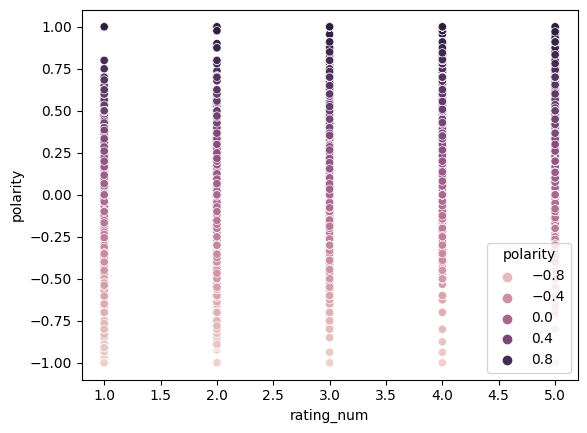

In [ ]:
# relationship between sentiment and rating.
# doesn't seem like what we'd expect.
sns.scatterplot(x = "rating_num",
                y = "polarity",
                hue = "polarity",
                data = data)

In [16]:
data.to_csv("/content/drive/MyDrive/DSCI-D590 NLP/group project/mcdonald_clean.csv")